# 16 personalities classifier

This project aims to create a classifier for 16personality dataset, which would 
predict the personlity type given answer scores to the test questions.
The dataset used is taken from kaggle : https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt?select=16P.csv


In this artefact 4 machine learning algorithms will be tried out: DecisionTree, Random Forest Classifer, K-Nearest Neighbour and Support Vector Classifier. 

In [ ]:
# importing all neceserry libraries and modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [ ]:
# reading the data into a dataframe
df = pd.read_csv("16P.csv",encoding='cp1252')
df

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [ ]:
# a new column is created, the value of which is equal to the sum 
# of the scores for all questions. This was done with thought of possible 
# correlation betweem the total sum and personality type
df['sum'] = df.drop('Response Id', axis=1).sum(axis='columns')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality,sum
0,0,0,0,0,0,0,1,1,0,0,...,0,0,-1,0,0,0,0,0,ENFP,-1
1,1,0,0,-2,-3,-1,2,-2,0,3,...,-2,0,2,0,-1,-1,-1,3,ISFP,2
2,2,0,0,2,0,-1,2,0,0,1,...,2,0,2,-1,0,1,2,1,INFJ,7
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,-1,-1,0,1,0,-2,-1,ISTP,-8
4,4,0,0,-1,0,2,-1,-2,0,1,...,1,0,2,0,1,-1,2,-1,ENFJ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,2,0,1,0,0,2,3,3,INFJ,12
59995,59995,0,0,-2,1,3,0,-3,0,2,...,1,0,0,0,0,2,0,-2,ESTP,0
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,2,0,-3,0,1,-1,0,-1,ISTP,-1
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,2,0,2,0,0,0,1,0,ISTJ,4


In [ ]:
# all columns are renamed as numbers for convenience purposes as the previous names 
# were long questions
df.columns = np.arange(len(df.columns))

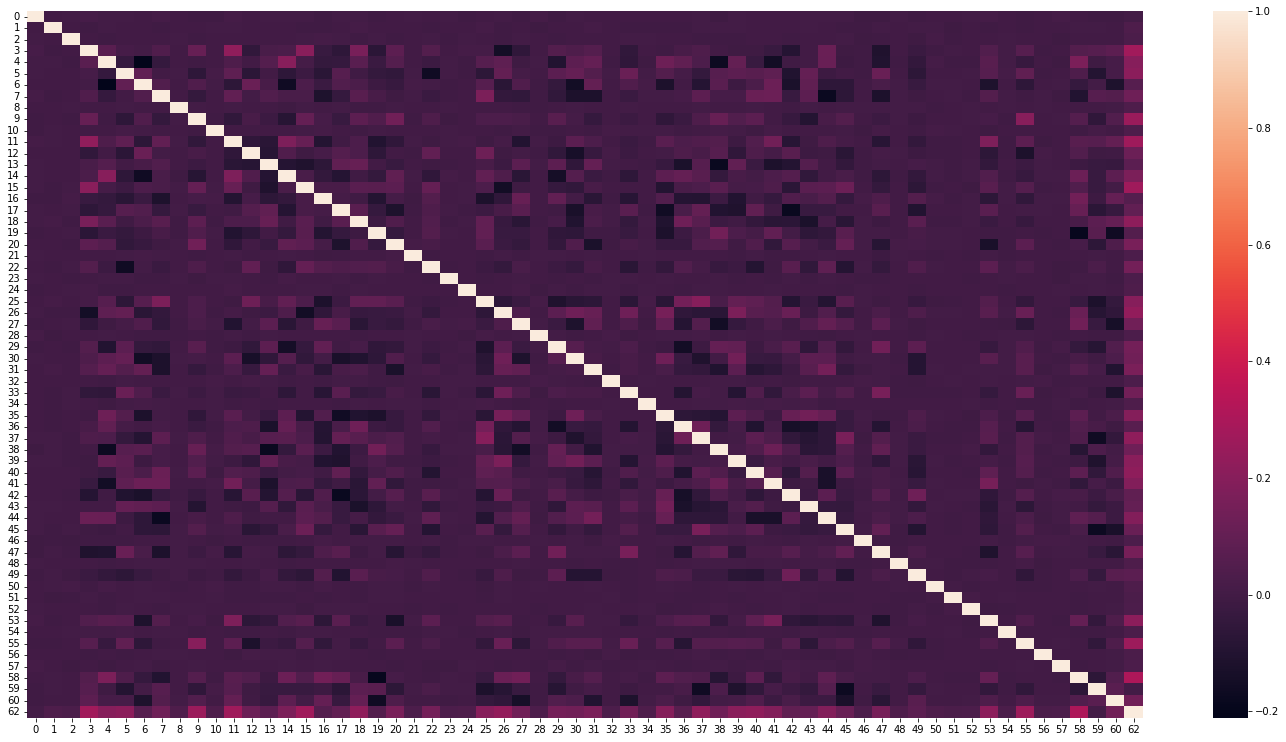

In [ ]:
# a heatmap is plotted to chech whether there is a noticible correlation
# between some variables
plt.figure(figsize = (25,13))
sns.heatmap(df.corr())
# correlations between certain variables can be observed, however none of them 
# are significant

In [ ]:
# dataset is split into features and target variable
X = df.drop([0,61], axis=1) # Features - exluding ID and personality columns
y = df[[61]] # Target variable
# dataset is split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train and 30% test

In [ ]:
# Standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Transform both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Make an instance of the model to retain 95% of the variance within the old features.
pca = PCA(.95)
pca.fit(X_train)

print('Number of Principal Components = '+str(pca.n_components_))

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Number of Principal Components = 55


## Decision Tree

First a decision tree algorithm is applied. 

In [ ]:
dt_clf = DecisionTreeClassifier() 
dt_clf = dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test) #Predict the response for test dataset
accuracy_score_dt = accuracy_score(y_test, y_pred)

In [ ]:
print("DT accuracy with test split: " + str(accuracy_score_dt))

# checking to see if there's overfitting
y_pred_train_tree = dt_clf.predict(X_train) #Predict the response for train dataset
accuracy_score_dt_train = accuracy_score(y_train, y_pred_train_tree)
print("DT accuracy with train split: " + str(accuracy_score_dt_train))

DT accuracy with test split: 0.776
DT accuracy with train split: 1.0


The model showed a 100% accuracy on the training set which means it is overfit.
 
GridSearchCV will be applied to try to prevent the overfitting.

In [ ]:
# Confusion Matrix is plotted to see how well the model is doing at classifyng
# each personality type
labels = ['ESTJ','ENTJ','ESFJ','ENFJ','ISTJ','ISFJ','INTJ','INFJ','ESTP','ESFP'
,'ENTP','ENFP','ISTP','ISFP','INTP','INFP']

cm_Model_dt = confusion_matrix(y_test, y_pred, labels=labels)

[Text(0, 0.5, 'ESTJ'),
 Text(0, 1.5, 'ENTJ'),
 Text(0, 2.5, 'ESFJ'),
 Text(0, 3.5, 'ENFJ'),
 Text(0, 4.5, 'ISTJ'),
 Text(0, 5.5, 'ISFJ'),
 Text(0, 6.5, 'INTJ'),
 Text(0, 7.5, 'INFJ'),
 Text(0, 8.5, 'ESTP'),
 Text(0, 9.5, 'ESFP'),
 Text(0, 10.5, 'ENTP'),
 Text(0, 11.5, 'ENFP'),
 Text(0, 12.5, 'ISTP'),
 Text(0, 13.5, 'ISFP'),
 Text(0, 14.5, 'INTP'),
 Text(0, 15.5, 'INFP')]

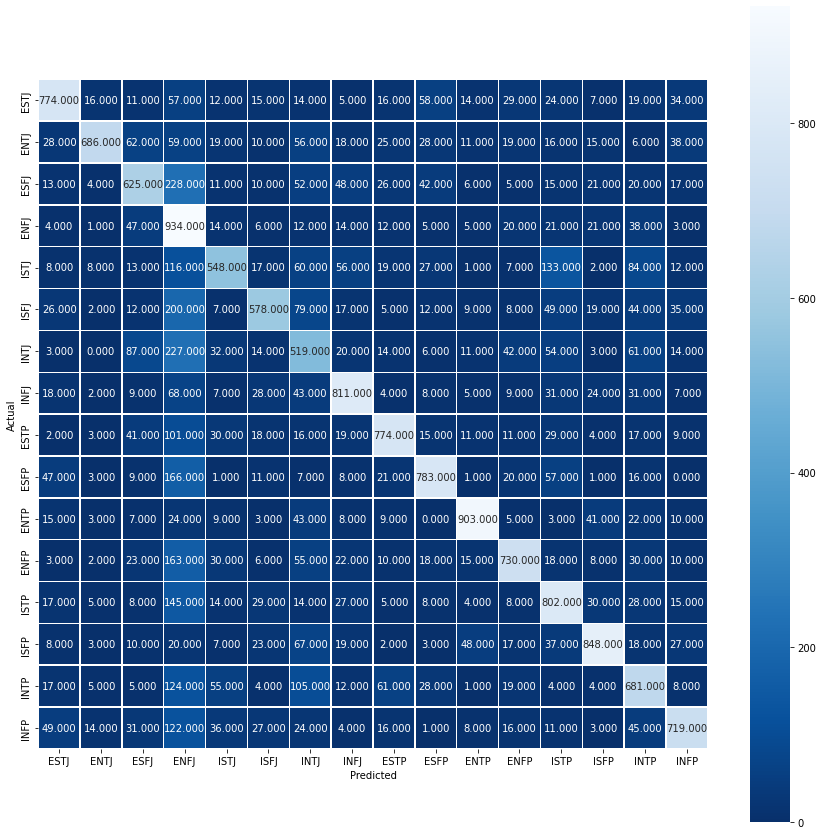

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

It can be observed that the model is performing the best at identifying ENFJ and ENTP types, and worst with INTJ. 

However, all scores are quite good. 

In [ ]:
# Applyng the GridSearchCV to try to select the best value for hyper-parameter max-depth

# Split the dataset in two equal parts
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"max_depth" : [8,9,10,11,12]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(Xx_train, yy_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    yy_true, yy_pred = yy_test, clf.predict(Xx_test)
    print(classification_report(yy_true, yy_pred))
    print()



# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 12}

Grid scores on development set:

0.507 (+/-0.005) for {'max_depth': 8}
0.544 (+/-0.014) for {'max_depth': 9}
0.575 (+/-0.025) for {'max_depth': 10}
0.594 (+/-0.018) for {'max_depth': 11}
0.605 (+/-0.012) for {'max_depth': 12}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

        ENFJ       0.60      0.65      0.63      1867
        ENFP       0.55      0.57      0.56      1943
        ENTJ       0.62      0.67      0.65      1826
        ENTP       0.62      0.62      0.62      1791
        ESFJ       0.57      0.60      0.59      1889
        ESFP       0.63      0.63      0.63      1871
        ESTJ       0.64      0.67      0.66      1895
        ESTP       0.65      0.66      0.65      1853
        INFJ       0.66      0.63      0.64

So the GridSearch returned that the model performs best with max_depths 12. 

However, after inputing that value into the model and rechecking for overfitting, the model still performed too well on the training set. 

After doing some reasearch I decided to allow maximum 5% difference between the model performance accuracy on train and test splits. 

Therefore, after trying max_depths values of 8,9,10,11,12 I decided to keep 8,as it had the lowest difference(2%) between the mentioned scores 

### Decision tree after GridSearchCV

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=8) 
dt_clf = dt_clf.fit(X_train,y_train) 

y_pred = dt_clf.predict(X_test) 
accuracy_score_dt = accuracy_score(y_test, y_pred)
print("DT accuracy with test split: " + str(accuracy_score_dt))

y_pred_train_tree = dt_clf.predict(X_train)
accuracy_score_dt_train = accuracy_score(y_train, y_pred_train_tree)
print("DT accuracy with train split: " + str(accuracy_score_dt_train))


# max_depth  test_score train_score
# 8  0.65  0.66
# 9  0.67  0.72
# 10 0.71  0.77
# 11 0.75  0.82 
# 12 0.76  0.86 

DT accuracy with test split: 0.6510555555555556
DT accuracy with train split: 0.6737065168218291


The final model produced an accuracy score of 65% on test split - the predictions are not as accurate as I would like them to be.

## Random Forest Classifier

Next Random Forest algorithm will be applied

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model = rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_score_rf = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print("RFC accuracy score on test split: "+ str(accuracy_score_rf))

y_pred_train = rf_model.predict(X_train)
accuracy_score_rf_train = accuracy_score(y_train, y_pred_train)
print("RFC accuracy score on train split: "+ str(accuracy_score_rf_train))

RFC accuracy score on test split: 0.9705
RFC accuracy score on train split: 1.0


Once again, the model is overfit. The same technique will be applied to prevent that.

Text(0.5, 1.0, 'Random Forest Model Accuracy Score = 84.33%')

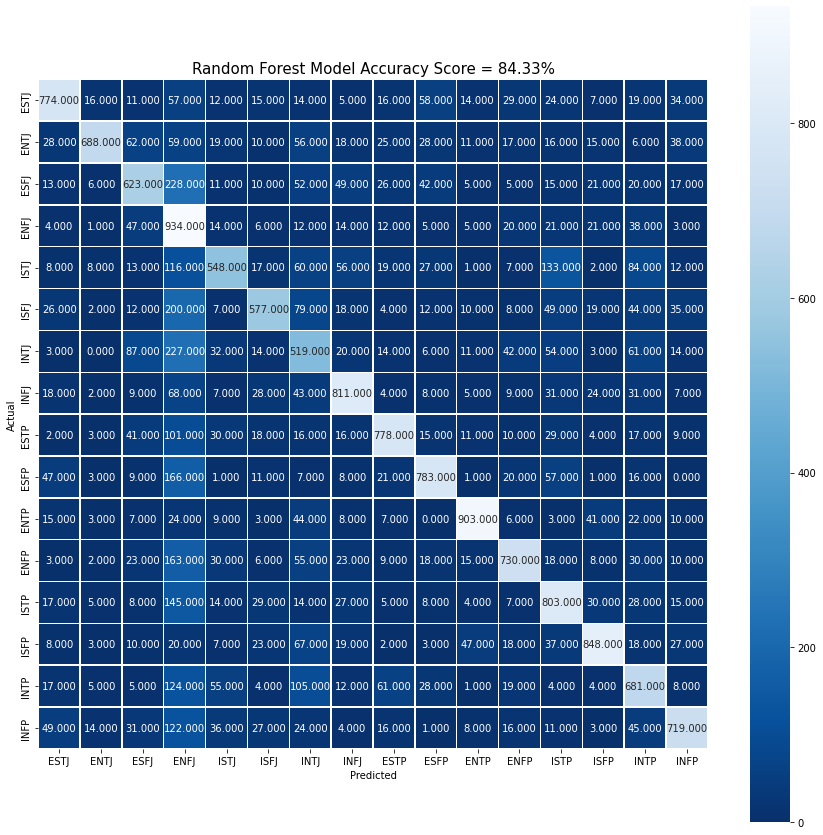

In [ ]:
labels = ['ESTJ','ENTJ','ESFJ','ENFJ','ISTJ','ISFJ','INTJ','INFJ','ESTP','ESFP'
,'ENTP','ENFP','ISTP','ISFP','INTP','INFP']
# Confusion Matrix
cm_Model_rf = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)


In [ ]:
# Applyng the GridSearchCV to try to select the best value for hyper-parameter
# n_estimators
# Split the dataset in two equal parts
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"n_estimators" : [10,50,100,150]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(Xx_train, yy_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    yy_true, yy_pred = yy_test, clf.predict(Xx_test)
    print(classification_report(yy_true, yy_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters set found on development set:

{'n_estimators': 150}

Grid scores on development set:

0.872 (+/-0.008) for {'n_estimators': 10}
0.961 (+/-0.005) for {'n_estimators': 50}
0.969 (+/-0.003) for {'n_estimators': 100}
0.972 (+/-0.003) for {'n_estimators': 150}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

        ENFJ       0.97      0.98      0.98      1867
        ENFP       0.99      0.98      0.98      1943
        ENTJ       0.97      0.98      0.97      1826
        ENTP       0.97      0.97      0.97      1791
        ESFJ       0.97      0.96      0.97      1889
        ESFP       0.98      0.98      0.98      1871
        ESTJ       0.97      0.98      0.97      1895
        ESTP       0.97      0.97      0.97      1853
        INFJ       0.97      0.97      0.97      1831
        INFP       0.96      0.98      0.97      

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters set found on development set:

{'n_estimators': 150}

Grid scores on development set:

0.866 (+/-0.005) for {'n_estimators': 10}
0.961 (+/-0.002) for {'n_estimators': 50}
0.969 (+/-0.005) for {'n_estimators': 100}
0.972 (+/-0.002) for {'n_estimators': 150}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

        ENFJ       0.97      0.98      0.98      1867
        ENFP       0.98      0.98      0.98      1943
        ENTJ       0.97      0.98      0.97      1826
        ENTP       0.97      0.98      0.97      1791
        ESFJ       0.97      0.96      0.97      1889
        ESFP       0.98      0.98      0.98      1871
        ESTJ       0.97      0.98      0.97      1895
        ESTP       0.97      0.98      0.97      1853
        INFJ       0.97      0.96      0.97      1831
        INFP       0.96      0.98      0.97      

Once again, after using the recommended value of 150, the model was still ovewrfitting. 

So I chose to input n_estimators = 5. However, the model was still very close to overfitting and the difference between test and train accuracy was very big. 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=5)
rf_model = rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_score_rf = accuracy_score(y_test, y_pred)
print("RFC accuracy score on test split: "+ str(accuracy_score_rf))
 
print("RFC accuracy score on train split: "+ str(accuracy_score_rf_train))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RFC accuracy score on test split: 0.8434444444444444
RFC accuracy score on train split: 0.9889759279982857


The final accuracy of the model - 84%. That would be a good model if it wasn't overfit. 

## KNeighborsClassifier

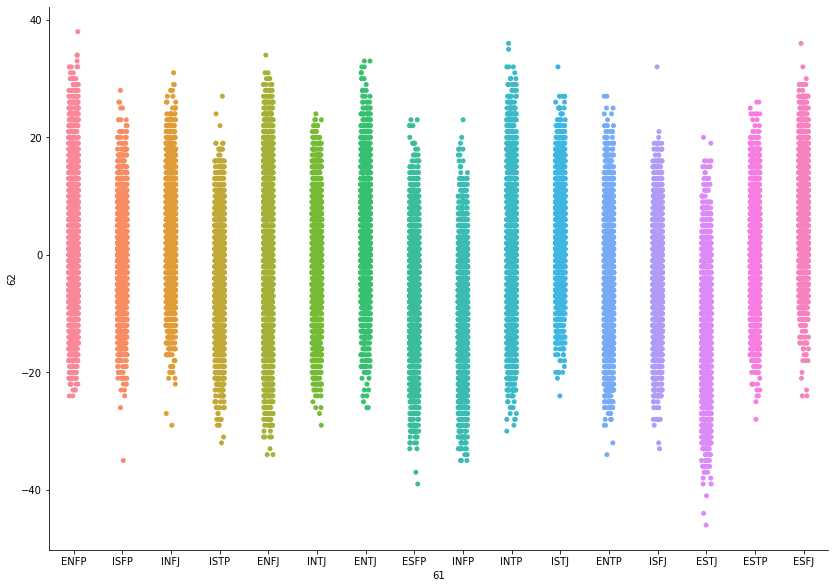

In [ ]:
# this was plotted to see if there is a significant relationship between 
# 'sum' and personality type but none was found
sns.catplot(x=61, y=62, data=df,height=8.27, aspect=11.7/8.27)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Error Rate')

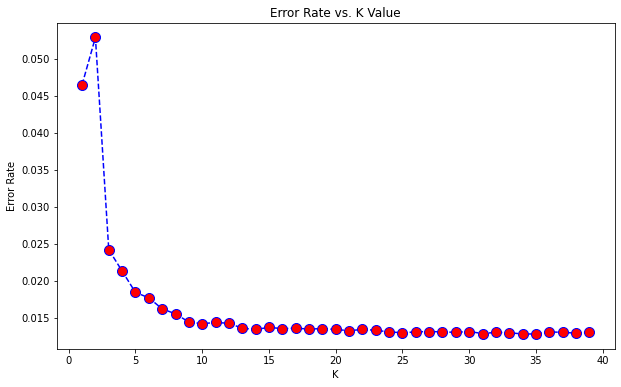

In [ ]:
# Finding the best number of n_neighbours to input to the model
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 pred_i=pred_i.reshape(18000,1)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
import numpy as np
arr = np.array(error_rate)
idx = np.argmin(arr)

print("Minimum error:",arr.min(), "at K =",idx)

Minimum error: 0.012 at K = 21


In [ ]:
# training the model with the optimal n/-neighbors 
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score_knn = accuracy_score(y_test, y_pred)
print(accuracy_score_knn)
print(classification_report(y_test,y_pred))

In [ ]:
y_pred_train = knn.predict(X_train)
print(classification_report(y_train,y_pred_train))

In [ ]:
# checking to see if there's overfitting
print("KNN accuracy on test: " + str(accuracy_score_knn))
accuracy_score_knn_train = accuracy_score(y_train, y_pred_train)
print("KNN accuracy on train: " + str(accuracy_score_knn_train))


KNN accuracy on test: 0.9872222222222222
KNN accuracy on train: 0.9872139812852687


No overfitting was found. The model's accuracy - 98.7%. The best one so far but might be unrealistically  high

## Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf = svc_clf.fit(X_train,y_train) # Fit/Train SVC on training set

y_pred = svc_clf.predict(X_test) #Predict the response for test dataset
accuracy_score_svc = accuracy_score(y_test, y_pred)
print("SVC accuracy with test split: " + str(accuracy_score_svc))

y_pred_train_tree = svc_clf.predict(X_train) #Predict the response for train dataset
accuracy_score_svc_train = accuracy_score(y_train, y_pred_train_tree)
print("SVC accuracy with train split: " + str(accuracy_score_svc_train))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC accuracy with test split: 0.9877222222222222
SVC accuracy with train split: 0.9892378389961666


Just like with previous model - no overfitting and similar accuracy score. 

In conclusion, the algorithms that performed the best were K-neighbours classifier and SVR with the accuracies of 98%. 